# **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("/content/Google_Stock_Test (2023).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
138,2023-07-24,121.660004,123.000000,120.980003,121.529999,121.529999,29686100
139,2023-07-25,121.360001,123.150002,121.019997,122.209999,122.209999,52509600
140,2023-07-26,130.070007,130.979996,128.320007,129.270004,129.270004,61682100
141,2023-07-27,131.669998,133.240005,128.789993,129.399994,129.399994,44952100


In [4]:
df1=df.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       143 non-null    object 
 1   Open       143 non-null    float64
 2   High       143 non-null    float64
 3   Low        143 non-null    float64
 4   Close      143 non-null    float64
 5   Adj Close  143 non-null    float64
 6   Volume     143 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.9+ KB


In [6]:
df1["Date"]=pd.to_datetime(df1["Date"])
df1.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       143 non-null    datetime64[ns]
 1   Open       143 non-null    float64       
 2   High       143 non-null    float64       
 3   Low        143 non-null    float64       
 4   Close      143 non-null    float64       
 5   Adj Close  143 non-null    float64       
 6   Volume     143 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 7.9 KB


In [8]:
df1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df1.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,143,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02
mean,2023-04-15 23:29:47.412587520,107.461259,109.036644,106.351678,107.782168,107.782168,3.669292e+07
min,2023-01-03 00:00:00,85.980003,87.570000,84.860001,86.199997,86.199997,1.446790e+07
25%,2023-02-23 12:00:00,95.509998,97.625000,94.494999,96.525002,96.525002,2.770280e+07
50%,2023-04-17 00:00:00,105.470001,106.690002,104.110001,105.410004,105.410004,3.326680e+07
75%,2023-06-06 12:00:00,120.690002,122.305001,119.315002,120.694999,120.694999,4.093580e+07
max,2023-07-28 00:00:00,131.669998,133.740005,130.570007,132.580002,132.580002,1.194550e+08
std,NaN,12.704584,12.799080,12.610591,12.620808,12.620808,1.415642e+07


# **Visualize the time series data**

<Axes: >

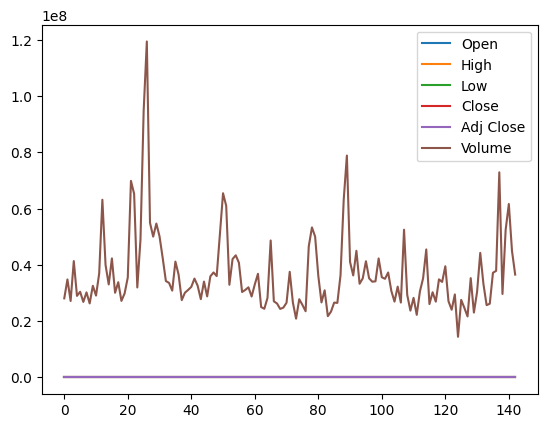

In [10]:
df.plot()

In [11]:
#test for stationary
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df["Adj Close"])

In [16]:
def adfuller_test(Adj_Close):
    result = adfuller(Adj_Close)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for i, j in zip(result, labels):
        print(f'{j:25} = {i}')
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
              print("strong evidence against the null hypothesis(Ho) reject the null hypothesis, Data has no unit root and is stationary")
    else:
        print("weak evidence against the null hypothesis,time series has a unit root, indicating it is non-stationary")


In [17]:
adfuller_test(df["Adj Close"])

ADF Test Statistic        = -0.6570534530377593
p-value                   = 0.8575623460941212
#Lags Used                = 0
Number of Observations Used = 142
ADF Test Statistic : -0.6570534530377593
p-value : 0.8575623460941212
#Lags Used : 0
Number of Observations Used : 142
weak evidence against the null hypothesis,time series has a unit root, indicating it is non-stationary


# **Differencing**

In [20]:
df1["Adj Close First Difference"]=df1["Adj Close"]-df1["Adj Close"].shift(1)

In [22]:
df1["Adj Close Seasonal First Difference"]=df1["Adj Close"]-df1["Adj Close"].shift(12)

In [24]:
df1.head(14)

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close First Difference,Adj Close Seasonal First Difference
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200,NaN,NaN
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800,-1.040001,NaN
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400,-1.880005,NaN
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500,1.139999,NaN
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900,0.680001,NaN
5,2023-01-10,85.980003,88.669998,85.830002,88.419998,88.419998,30467800,0.400001,NaN
6,2023-01-11,89.180000,91.599998,89.010002,91.519997,91.519997,26862000,3.099999,NaN
7,2023-01-12,91.480003,91.870003,89.750000,91.129997,91.129997,30258100,-0.390000,NaN
8,2023-01-13,90.849998,92.190002,90.129997,92.120003,92.120003,26329200,0.990006,NaN
9,2023-01-17,92.059998,92.250000,90.050003,91.290001,91.290001,32602400,-0.830002,NaN


In [25]:
#again test dickey fuller test
adfuller_test(df1["Adj Close Seasonal First Difference"].dropna())

ADF Test Statistic        = -3.3858836468672733
p-value                   = 0.011449613992472376
#Lags Used                = 12
Number of Observations Used = 118
ADF Test Statistic : -3.3858836468672733
p-value : 0.011449613992472376
#Lags Used : 12
Number of Observations Used : 118
strong evidence against the null hypothesis(Ho) reject the null hypothesis, Data has no unit root and is stationary


<Axes: >

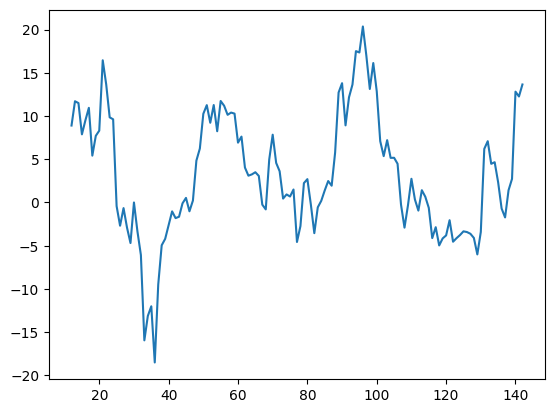

In [26]:
df1['Adj Close Seasonal First Difference'].plot()

# **Auto regressive model**

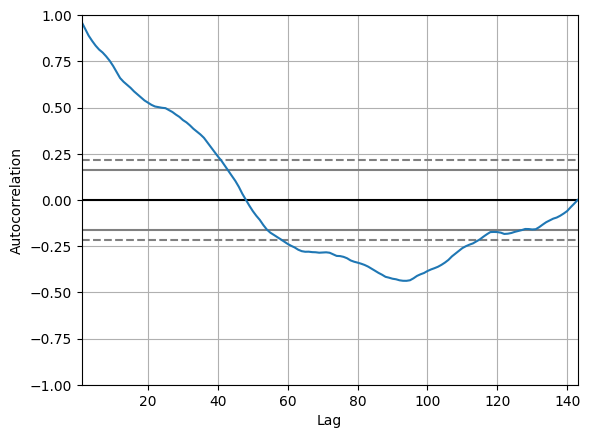

In [31]:
#!pip instal pandas
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Adj Close'])
plt.show()


# **Auto correlation and partial auto correlation**

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

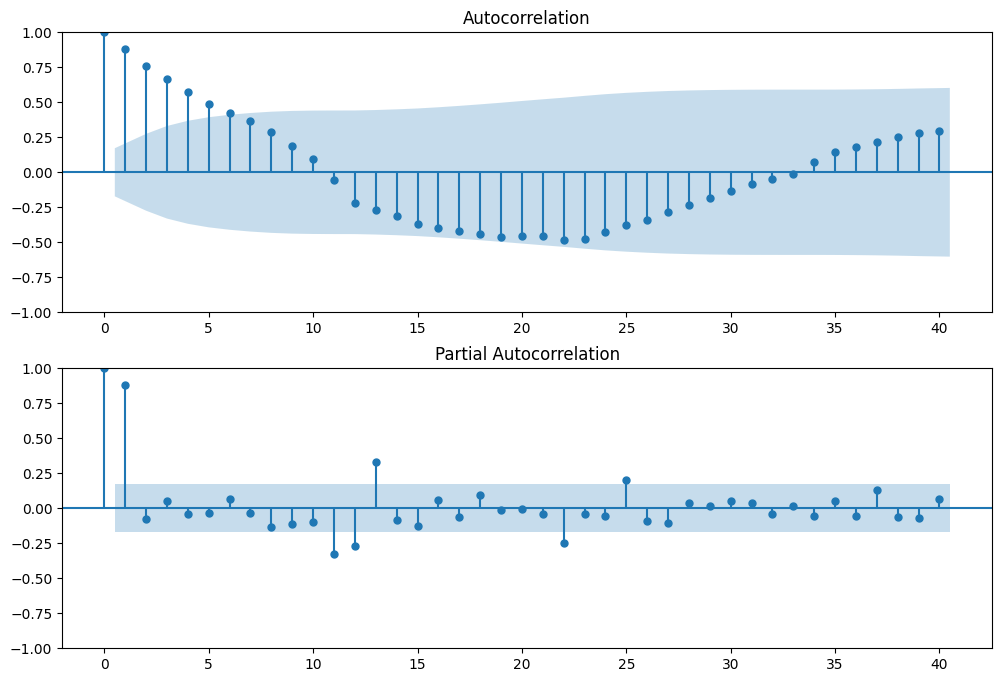

In [33]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df1['Adj Close Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df1['Adj Close Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

# **ARIMA model**

In [38]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df1['Adj Close'],order=(1,0,1))
model_fit=model.fit()

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -320.215
Date:                Sun, 30 Jun 2024   AIC                            648.430
Time:                        11:08:33   BIC                            660.282
Sample:                             0   HQIC                           653.246
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.6406     12.526      8.753      0.000      85.089     134.192
ar.L1          0.9896      0.019     52.950      0.000       0.953       1.026
ma.L1          0.0914      0.073      1.244      0.214      -0.053       0.235
sigma2         5.0142      0.449     11.180      0.000       4.135       5.893
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                19.62
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.06
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

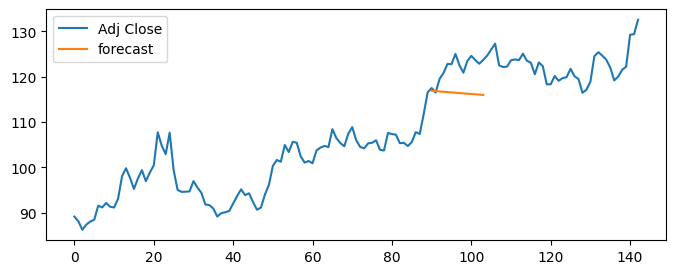

In [44]:
#prediction before knowing original data
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['Adj Close','forecast']].plot(figsize=(8,3))

# **SARIMA Model**

In [45]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df1['Adj Close'],order=(1,0,1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

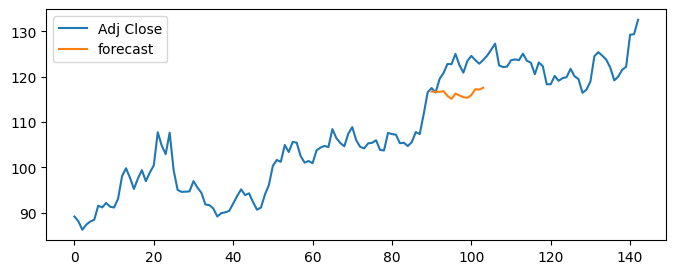

In [46]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Adj Close','forecast']].plot(figsize=(8,3))

In [49]:
from pandas.tseries.offsets import DateOffset
df1.index = pd.to_datetime(df1.index)
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [50]:
future_dataset_df1=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [52]:
future_dataset_df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close First Difference,Adj Close Seasonal First Difference,forecast
1971-08-01 00:00:00.000000142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-09-01 00:00:00.000000142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-10-01 00:00:00.000000142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-11-01 00:00:00.000000142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971-12-01 00:00:00.000000142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
future_df1=pd.concat([df1,future_dataset_df1])

In [54]:
future_df1['forecast'] = results.predict(start = 104, end = 120, dynamic= True)

<Axes: >

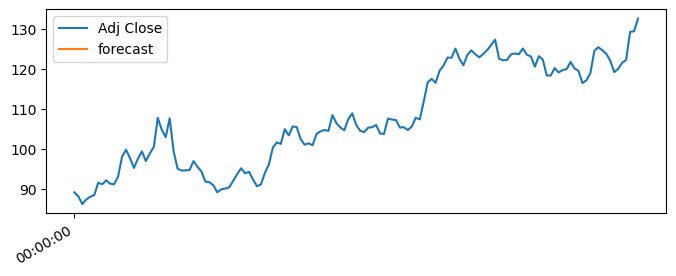

In [57]:
future_df1[['Adj Close', 'forecast']].plot(figsize=(8, 3))